# Part 3: This part is about Fourier Transformation


In [2]:
## load dependancies

import numpy as np 
import cv2
from matplotlib import pyplot as plt

In [3]:
## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
## this function is to do fourier transformation given any image input

def magnitude_phase_split(img):
    ## img is a one-channel image, either gray-scale or r/g/b channel

    ## this step calls numpy->fft2 to do fourier transformation
    dft = np.fft.fft2(img)

    ## shift the low-frequent signals to center
    dft_shift = np.fft.fftshift(dft)

    ## obtain the magnitude
    magnitude_spectrum = np.abs(dft_shift)

    ## obtain the phase
    phase_spectrum = np.angle(dft_shift)

    return magnitude_spectrum, phase_spectrum


def magnitude_phase_combine(img_m, img_p):
    ## combine magnitude and phase
    ## this step gives the chance to exchange the phase and magnitude from different images
    img_mandp = img_m*np.e**(1j*img_p)

    ## this step is doing inverse fourier transformation
    img_mandp = np.uint8(np.abs(np.fft.ifft2(img_mandp)))

    ## normalize the image pixel intensity
    img_mandp=img_mandp/np.max(img_mandp)*255 
    return img_mandp

def log_process(img_m):
    ## this function is to change the scale of magnitude for better visualization
    dftAmpLog = 20*np.log(np.abs(img_m))
    return dftAmpLog


def mask_generation(img, r_out=20, r_in=2):
    ## this function is to generate a mask for img with inner/outer radius as r_in/r_out;
    rows, cols = img.shape
    crow, ccol = int(rows / 2), int(cols / 2)  # center

    mask = np.zeros((rows, cols), np.uint8)
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                              ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
    mask[mask_area] = 1
    return mask




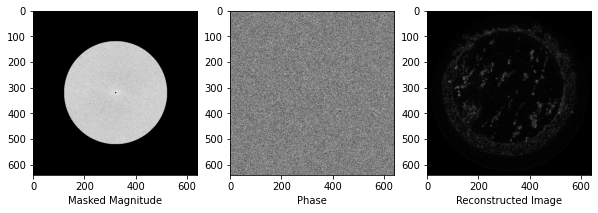

In [5]:
## read image
img_path = '/content/drive/My Drive/Computer Vision/Assignment1/Part3/'

img = cv2.imread(img_path+'alloy.png', 0)

## do fourier transformation
img_m, img_p = magnitude_phase_split(img)

img_mlog = log_process(img_m)

## generate a mask
mask = mask_generation(img, 200, 3)

# apply mask 
img_mask = img_m * mask
img_mlog_mask = img_mlog*mask

## send the masked magnitude and phase to reconstruction
img_rec = magnitude_phase_combine(img_mask, img_p)

plt.figure(figsize=(10,12))
plt.subplot(131)
plt.xlabel("Masked Magnitude")
plt.imshow(img_mlog_mask, cmap="gray") 
plt.subplot(132)
plt.xlabel("Phase")
plt.imshow(img_p, cmap="gray") 
plt.subplot(133) 
plt.imshow(img_rec, cmap="gray") 
plt.xlabel("Reconstructed Image") 

plt.show()

# TO DO




### Task 1:
To load two images and switch the phase and maganitude, and then visulize the output. **Note that the size of images are needed to be same.**


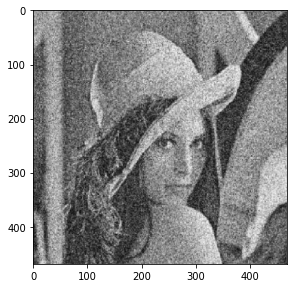

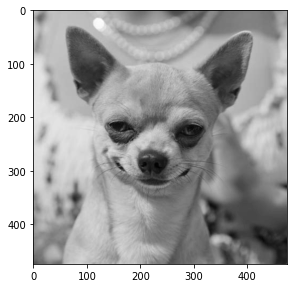

In [6]:
img_path ='/content/drive/My Drive/Computer Vision/Assignment1/Part3/'

lena = 'lena.jpg'
dog = 'dog.jpg'

lena_img = cv2.imread(img_path + lena, 0)
dog_img = cv2.imread(img_path + dog, 0)

plt.figure(figsize=(10,12))
plt.subplot(121)
plt.imshow(lena_img, cmap="gray") 
plt.figure(figsize=(10,12))
plt.subplot(122)
plt.imshow(dog_img, cmap="gray") 

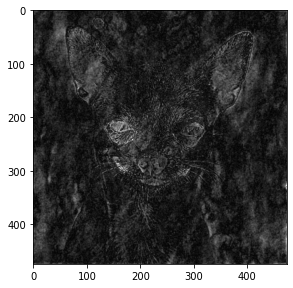

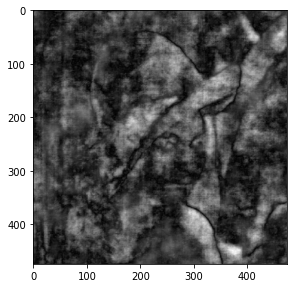

In [7]:
## Fourier image

## do fourier transformation
# LENA
lena_img_m, lena_img_p = magnitude_phase_split(lena_img)
lena_img_mlog = log_process(lena_img_m)

#DOG
dog_img_m, dog_img_p = magnitude_phase_split(dog_img)
dog_img_mlog = log_process(dog_img_m)

## generate a mask
lena_mask = mask_generation(lena_img, 200, 2)

dog_mask = mask_generation(dog_img, 200, 2)

# apply mask 
lena_img_mask = lena_img_m * lena_mask
lena_img_mlog_mask = lena_img_mlog*lena_mask

dog_img_mask = dog_img_m * dog_mask
dog_img_mlog_mask = dog_img_mlog*dog_mask

## send the masked magnitude and phase to reconstruction
lena_mag_dog_phase = magnitude_phase_combine(np.pad(lena_img_mask,(4,1)), dog_img_p)

dog_mag_lena_phase = magnitude_phase_combine(dog_img_mask, np.pad(lena_img_p, (4,1)))



plt.figure(figsize=(10,12))
plt.subplot(121)
plt.imshow(lena_mag_dog_phase, cmap="gray") 

plt.figure(figsize=(10,12))
plt.subplot(122)
plt.imshow(dog_mag_lena_phase, cmap="gray") 


### Task 2:
To change the mask using different inner and outer radius to see the difference


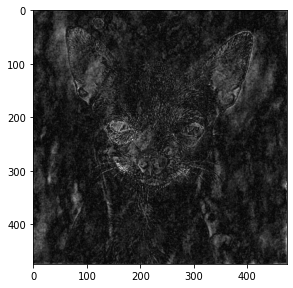

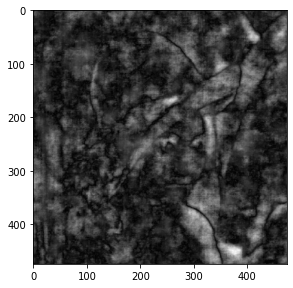

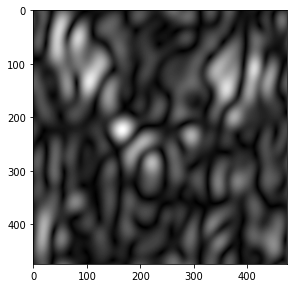

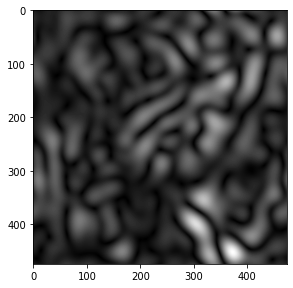

In [8]:
## generate a mask
lena1_mask = mask_generation(lena_img, 1000, 3)

dog1_mask = mask_generation(dog_img, 1000, 3)

lena2_mask = mask_generation(lena_img, 10, 3)

dog2_mask = mask_generation(dog_img, 10, 3)

# apply mask 
lena1_img_mask = lena_img_m * lena1_mask
lena1_img_mlog_mask = lena_img_mlog*lena1_mask

dog1_img_mask = dog_img_m * dog1_mask
dog1_img_mlog_mask = dog_img_mlog*dog_mask

lena2_img_mask = lena_img_m * lena2_mask
lena2_img_mlog_mask = lena_img_mlog*lena_mask

dog2_img_mask = dog_img_m * dog2_mask
dog2_img_mlog_mask = dog_img_mlog*dog2_mask
## send the masked magnitude and phase to reconstruction
lena_mag_dog_phase1 = magnitude_phase_combine(np.pad(lena1_img_mask,(4,1)), dog_img_p)

dog_mag_lena_phase1 = magnitude_phase_combine(dog1_img_mask, np.pad(lena_img_p, (4,1)))

lena_mag_dog_phase2 = magnitude_phase_combine(np.pad(lena2_img_mask,(4,1)), dog_img_p)

dog_mag_lena_phase2 = magnitude_phase_combine(dog2_img_mask, np.pad(lena_img_p, (4,1)))

plt.figure(figsize=(10,12))
plt.subplot(121)
plt.imshow(lena_mag_dog_phase1, cmap="gray") 

plt.figure(figsize=(10,12))
plt.subplot(122)
plt.imshow(dog_mag_lena_phase1, cmap="gray") 

plt.figure(figsize=(10,12))
plt.subplot(121)
plt.imshow(lena_mag_dog_phase2, cmap="gray") 

plt.figure(figsize=(10,12))
plt.subplot(122)
plt.imshow(dog_mag_lena_phase2, cmap="gray")

### Task 3:
**Open Question**: Try to use Fourier Transformation to remove noise from image 'lena.jpg' 


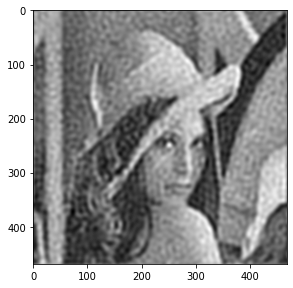

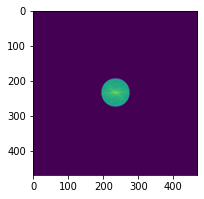

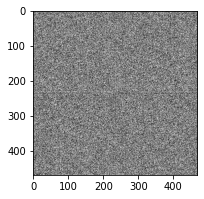

In [15]:
# LENA
lena_img_m, lena_img_p = magnitude_phase_split(lena_img)
lena_img_mlog = log_process(lena_img_m)

## generate a mask
lena_mask = mask_generation(lena_img, 40, 0)

# apply mask 
lena_img_mask = lena_img_m * lena_mask
lena_img_mlog_mask = lena_img_mlog*lena_mask

## send the masked magnitude and phase to reconstruction
lena_img_rec = magnitude_phase_combine(lena_img_mask, lena_img_p)

plt.figure(figsize=(10,12))
plt.subplot(121)
plt.imshow(lena_img_rec, cmap="gray") 

plt.figure(figsize=(10,12))
plt.subplot(132)
plt.imshow(lena_img_mlog_mask)

plt.figure(figsize=(10,12))
plt.subplot(133)
plt.imshow(lena_img_p, cmap="gray")